<Axes: >

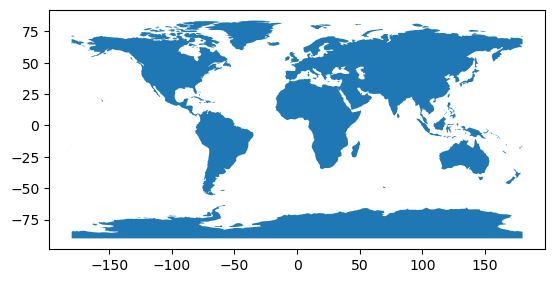

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

path = get_path("naturalearth.land")
df = gpd.read_file(path)
df.plot()

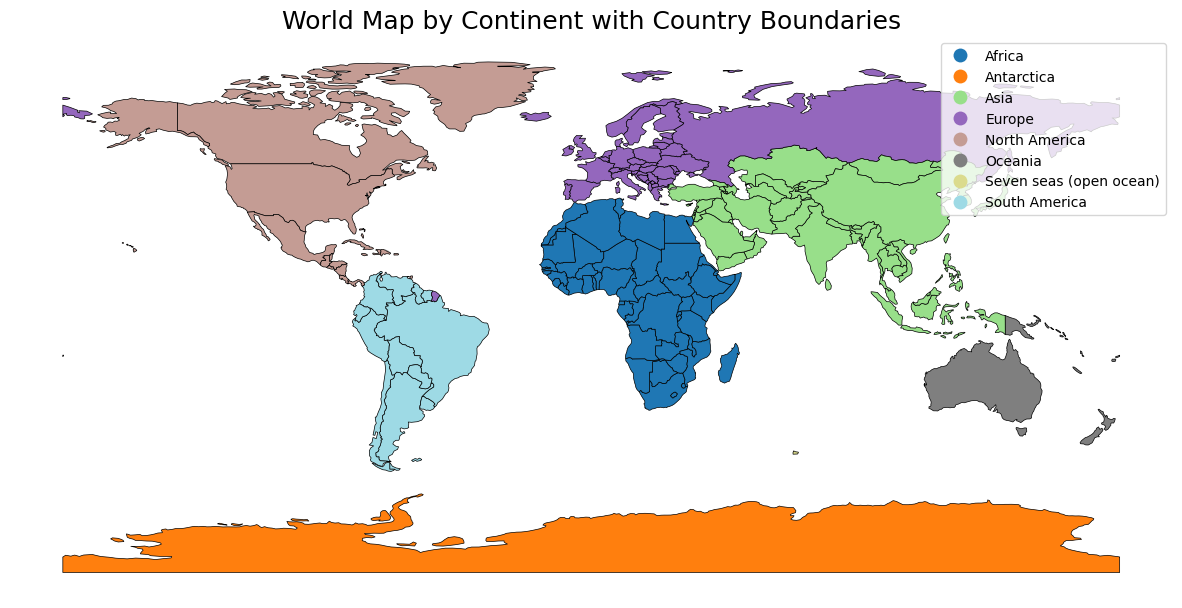

In [17]:
# Load the world map directly from geopandas
df = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Plot with colors by continent
fig, ax = plt.subplots(figsize=(15, 10))

df.plot(column='CONTINENT',  # Make sure to use uppercase key if needed
        cmap='tab20', 
        legend=True,
        edgecolor='black',
        linewidth=0.5,
        ax=ax)

plt.title("World Map by Continent with Country Boundaries", fontsize=18)
plt.axis('off')
plt.show()


In [20]:
import folium
# Load world data
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Make sure we have population data
world = world[world['POP_EST'].notnull()]  # filter missing data

# Convert to GeoJSON format for folium
geo_json_data = world.to_json()

# Create folium map centered at lat=0, lon=0
m = folium.Map(location=[0, 0], zoom_start=2)

# Function to create a popup with country and population
def style_function(feature):
    return {
        'fillOpacity': 0.6,
        'weight': 0.5,
        'color': 'black',
    }

def popup_function(feature):
    name = feature['properties']['NAME']
    pop = feature['properties']['POP_EST']
    return folium.Popup(f"<b>{name}</b><br>Population: {pop:,}", max_width=200)

# Add GeoJson to map with popup
folium.GeoJson(
    geo_json_data,
    name="Countries",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["NAME", "POP_EST"],
                                   aliases=["Country:", "Population:"],
                                   localize=True),
    popup=popup_function
).add_to(m)

# Show the map
m


In [19]:
import folium


# Load world data
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Clean up missing values
world = world[world['POP_EST'].notnull()]

# Convert GeoDataFrame to GeoJSON
geo_json_data = world.to_json()

# Create base folium map
m = folium.Map(location=[10, 0], zoom_start=2, tiles='cartodb positron')

# Add choropleth layer (color by population)
choropleth = folium.Choropleth(
    geo_data=geo_json_data,
    data=world,
    columns=['NAME', 'POP_EST'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',  # Yellow to Red
    fill_opacity=0.7,
    line_opacity=0.5,
    nan_fill_color='gray',
    legend_name='Estimated Population',
).add_to(m)

# Add tooltips with country + population
folium.GeoJsonTooltip(
    fields=["NAME", "POP_EST"],
    aliases=["Country:", "Population:"],
    localize=True,
    sticky=False
).add_to(choropleth.geojson)

# Optional: Layer control
folium.LayerControl().add_to(m)

# Display the map
m
